## Numerics

### Function of array indices

In [3]:
%%time 
print('eha')

eha
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 73.7 µs


### Product of list elements

In [70]:
from functools import reduce

l = range(1,4)
reduce(lambda x, y: x * y, l)

6

### Convolution

Important in CNN.

#### ND

##### 2D

In [97]:
from scipy import signal
from scipy import misc
pic = (misc.face())[..., 0] # PICK JUST ONE CHANNEL
# plt.imshow(pic)
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
print('sch sh', scharr.shape)
grad = signal.convolve2d(pic, scharr, boundary='symm', mode='same')

sch sh (3, 3)


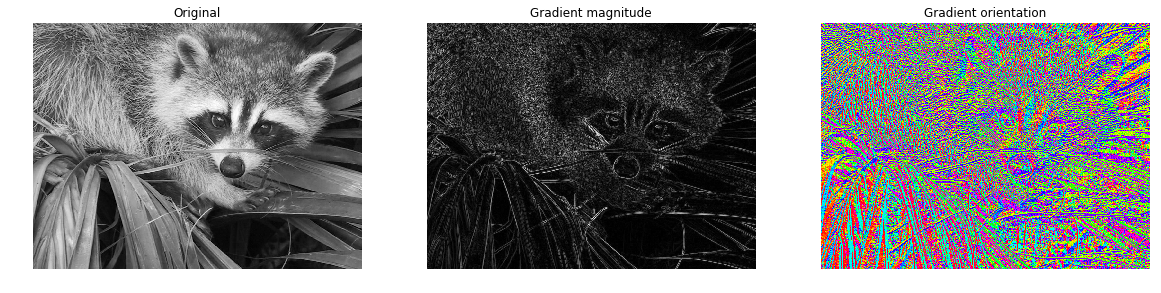

In [96]:
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3, figsize=(20,14))
ax_orig.imshow(pic, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()

##### By hand

In [58]:
mean = (1, 2)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, (10))
x.shape
x[0]

array([0.47149037, 2.99217679])

(-4.524160525849326, 4.542479895033259, -5.593195466254298, 5.306789942511703)

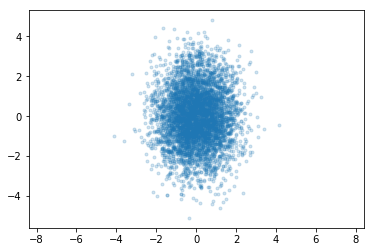

In [66]:
mean = [0, 0]
cov = [[1, 0], [0, 2]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, '.', alpha=0.2)
plt.axis('equal')

### Operating on large arrays

In [31]:
import time
def clock(f, *args, **kwargs):
    t1 = time.perf_counter()
    f(*args, **kwargs)
    t2 = time.perf_counter()
    return t2-t1

In [32]:
from fullwavepy.generic.math import norm_max, norm_rms

In [52]:
nx = int(1e4)
ny = 1
nz = nx
a = np.ones((nx,ny,nz))

In [53]:
clock(np.apply_along_axis, norm_max, -1, a)

0.5218968270346522

In [55]:
# clock(np.apply_along_axis, norm_rms, -1, a)

In [57]:
clock(np.apply_along_axis, n_rms, -1, a)

0.5717003997415304

In [50]:
def n_rms(y):
    return y / rms(y)

In [49]:
def rms(y):
    y = np.array(y)
    n = len(y)
    return np.sqrt(np.sum(y**2) / n)

### Reading large arrays

In [4]:
nx = 200
ny = 50
nz = 100
shape = (nx, ny, nz)

f = np.memmap('memmapped.dat', dtype=np.float32, mode='w+', shape=shape)

In [6]:
fname = '/home/kmc3817/heavy_PhD/start_mods/Ben_whole_model_24-04-18_x-15000_15000_y-5000_10000.sgy'
read_any()

#### Memory mapping

https://ipython-books.github.io/48-processing-large-numpy-arrays-with-memory-mapping/

In [ ]:
# Let's create a memory-mapped array in write mode:

In [8]:
nrows, ncols = 10, 10
f = np.memmap('memmapped.dat', dtype=np.float32, mode='w+', shape=(nrows, ncols))

In [9]:
for i in range(ncols):
    f[:, i] = np.random.rand(nrows)

In [10]:
x = f[:, -1]
x

memmap([0.32187343, 0.02219474, 0.49086756, 0.90351415, 0.9473835 ,
        0.71260095, 0.7045379 , 0.6469979 , 0.8279548 , 0.42168647],
       dtype=float32)

In [ ]:
# Now, we flush memory changes to disk by deleting the object:

In [11]:
del f

Reading a memory-mapped array from disk involves the same memmap() function. The data type and the shape need to be specified again, as this information is not stored in the file:

In [12]:
f = np.memmap('memmapped.dat', dtype=np.float32,
              shape=(nrows, ncols))

np.array_equal(f[:, -1], x)

True

### Vectorize a function

#### Example 1

In [3]:
import math

def haversine(row):
    a_lat, a_lng, b_lat, b_lng = row
    R = 6371     # earth radius in km

    a_lat = math.radians(a_lat)
    a_lng = math.radians(a_lng)
    b_lat = math.radians(b_lat)
    b_lng = math.radians(b_lng)

    d_lat = b_lat - a_lat
    d_lng = b_lng - a_lng

    a = math.pow(math.sin(d_lat / 2), 2) \
      + math.cos(a_lat) * math.cos(b_lat) \
      * math.pow(math.sin(d_lng / 2), 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [4]:
import numpy as np

coords = np.array([
    # orig_lat, orig_lng,  dest_lat,  dest_lng
    [52.516667, 13.388889, 51.507222, -0.1275],   # Berlin-London
    [52.516667, 13.388889, 55.75, 37.616667],     # Berlin-Moscow
    [55.75, 37.616667, 51.507222, -0.1275],       # Moscow-London
])

In [16]:
%timeit np.apply_along_axis(haversine, 1, coords)

48.2 µs ± 733 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
def vec_haversine(a_lat, a_lng, b_lat, b_lng):
    R = 6371  # earth radius in km

    a_lat = np.radians(a_lat)
    a_lng = np.radians(a_lng)
    b_lat = np.radians(b_lat)
    b_lng = np.radians(b_lng)

    d_lat = b_lat - a_lat
    d_lng = b_lng - a_lng

    d_lat_sq = np.sin(d_lat / 2) ** 2
    d_lng_sq = np.sin(d_lng / 2) ** 2

    a = d_lat_sq + np.cos(a_lat) * np.cos(b_lat) * d_lng_sq
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    return R * c  # returns distance between a and b in km

In [15]:
%timeit vec_haversine(coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3])

12.9 µs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Example 2

In [48]:
x = np.linspace(0, 9, 10)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
print X
print X.shape, Y.shape
print Y

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]]
(5, 10) (5, 10)
[[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]


In [50]:
def foo(x, y):
    r = np.array([x,y])
    n = norm(r)
    return n

vfoo = np.vectorize(foo)

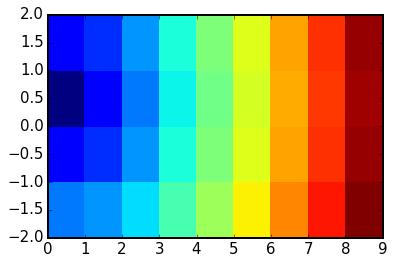

In [53]:
Z = vfoo(X, Y)
# print Z
pcolormesh(X, Y, Z)

#### With 'if' statements

just use np.where!

### mgrid vs meshgrid

- mgrid returns an array of arrays 
- meshgrid returns a list of arrays
- meshgrid arrays are just transposed mgrid subarrays!
- meshgrid was implemented to be compatible with MATLAB

In [76]:
xx, yy = np.mgrid[1:10, 1:5]
print xx.shape
print yy.shape

(9, 4)
(9, 4)


In [77]:
xx, yy = np.meshgrid(range(1,10), range(1,5))
print xx.shape
print yy.shape

(4, 9)
(4, 9)


### Filtering / smoothing

### Interpolation / resampling 

In [162]:
from scipy.interpolate import griddata

# DATA --------------------------------------------------------------------

# COARSE MESH OF POINTS (MAY BE EVEN IRREGULAR!)
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        points.append([x, y])
points = np.array(points)

# EVALUATE THE FUNCTION AT THIS COARSE MESH
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
values = func(points[:,0], points[:,1])
print points.shape, values.shape

# INTERPOLATION ------------------------------------------------------------
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j] # SIMILAR TO np.meshgrid()

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

(400, 2) (400,)


Text(0.5,1,'Cubic')

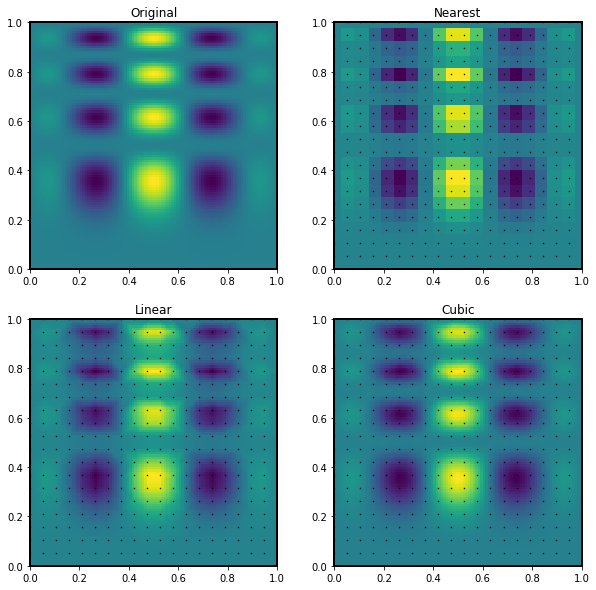

In [158]:
fig, ax = plt.subplots(figsize=[10,10])
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Cubic')

### Hilbert transform

In [42]:
dt = 0.001
tmax = 5
ts = np.arange(0, tmax+dt, dt)

sin = lambda t, f, phi : np.sin(2*np.pi*f*t + phi)

# ACOUSTIC BEAT
phi = 0
f1 = 1 # Hz 
sin1 = np.array([sin(t, f1, phi) for t in ts])

df = 0.1
f2 = f1 + df 
sin2 = np.array([sin(t, f2, phi) for t in ts])

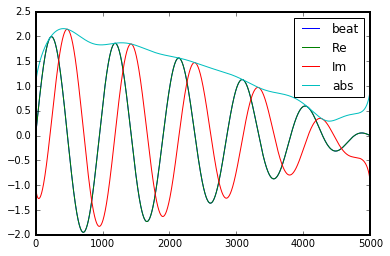

In [43]:
from scipy.signal import hilbert

beat = sin1 + sin2
plt.plot(beat, label='beat')

analytical_signal = hilbert(beat)
plt.plot(analytical_signal.real, label='Re')
plt.plot(analytical_signal.imag, label='Im')

amplitude_envelope = np.abs(analytical_signal)
plt.plot(amplitude_envelope, label='abs')
plt.legend()
# plt.grid()

### Derivative

#### Single trace

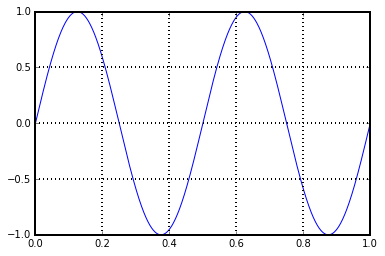

In [50]:
samples = np.arange(1000)
dt = 0.001 # s
ts = samples * dt
T = 0.5 # s

sin = lambda t : np.sin(2*np.pi*t/T)
s = np.array([sin(t) for t in ts])
plt.plot(ts, s)
plt.grid()

In [3]:
help(np.gradient)

Help on function gradient in module numpy:

gradient(f, *varargs, **kwargs)
    Return the gradient of an N-dimensional array.
    
    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:
    
        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
           dimension of

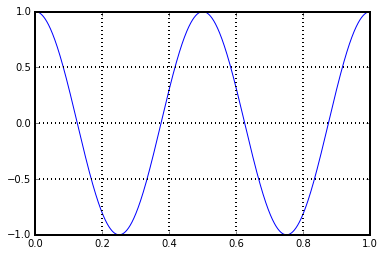

In [70]:
ds_dt = np.gradient(s, dt) * T / (2 * np.pi)
plt.plot(ts, ds_dt)
plt.grid()

#### Gather

In [ ]:
path = '/media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/fwi_press2vel/input/proj25-OutSeis.sgy'

### Integral

We can't just get indefinite integral since we don't know the integration constant!

In [100]:
np.trapz([1,2,3,4])

7.5

### Spectral analysis

In [101]:
# help(np.fft.rfft)

#### Various spectra

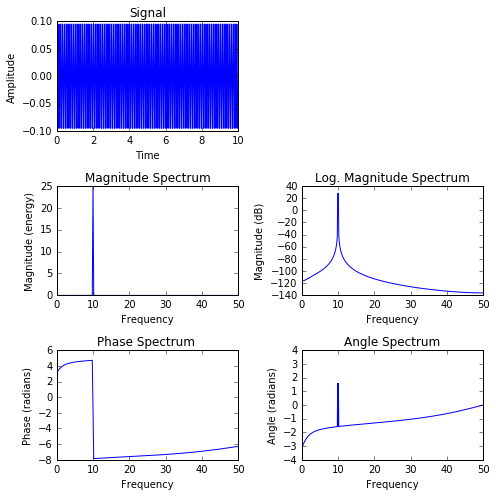

In [107]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise: (SWITCHED OFF NOW)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(10 * 2 * np.pi * t) #+ cnse  # the signal

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s)
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs)

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs)

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs)

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()

#### Spectrogram

4 129


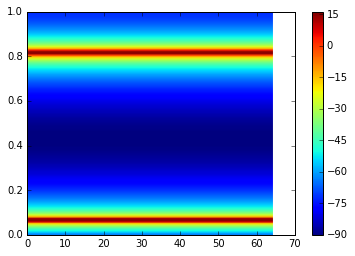

In [65]:
x = np.arange(2**8)
y = np.sin(10 * x) + np.sin(0.2 *x)
# plt.plot(x, y)
s = plt.specgram(y)
print len(s), len(s[0])
plt.colorbar()